In [1]:
from pathlib import Path

import numpy as np
import cv2
import matplotlib.pyplot as plt

In [2]:
print(np.random.randint(3, 1))

ValueError: low >= high

In [ ]:
def random_cropped(img, window=(None, None)): #TODO central crop!
    w, h = window
    img_w, img_h, img_c = img.shape

    if w is None and h is None:
        w = h = min(img_w, img_h)

    assert (img_w - w - 128 >= 0) and (img_h - h - 128 >= 0) and (img_c == 3), "Bad image shape: {}".format(img.shape)

    if img_w > w:
        x = np.random.randint(min(128, img_w - w - 128), img_w - w - 128)
    else:
        x = 0

    if img_h > h:
        y = np.random.randint(min(128, img_w - w - 128), img_h - h - 128)
    else:
        y = 0

    return img[x:x + w, y:y + h, :]


def blurred(img):
#    img = cv2.transpose(img, (1, 2, 0))
#    out = (255.0 * img[0, ...]).clip(0, 255).astype(np.uint8)
    #out = img.transpose((1, 2, 0))
    
    print(img.shape)
#    img = img.transpose((2, 0, 1))
    fig = plt.figure(8, 12)

    plt.imshow(img)

In [3]:

rop(img)
plt.imshow(crop)

NameError: name 'rop' is not defined

In [3]:
import cv2

alpha = np.float32(np.random.uniform(0.4, 0.8))
subject = cv2.imread("./data/subject_images/waiting_room_32_10_altavista.jpg")
subject = cv2.cvtColor(subject, cv2.COLOR_BGR2RGB)
#subject = subject.astype(np.float32) / 255.0
subject_resized = cv2.resize(subject, (128, 128))

astigma = cv2.imread("./data/astigma_images/20190811_03.jpg")
astigma = cv2.cvtColor(astigma, cv2.COLOR_BGR2RGB)
#astigma = astigma.astype(np.float32) / 255.0
astigma_cropped = random_cropped(astigma, (256, 256))
astigma_cropped = cv2.resize(astigma_cropped, (128, 128))

kernel = np.zeros((16, 16))
x1, y1, x2, y2 = np.random.randint(0, 12, size=4)
kernel[x1, y1] = 1.0 - np.sqrt(alpha)
kernel[x2, y2] = np.sqrt(alpha) - alpha
kernel = cv2.GaussianBlur(kernel, (5, 5), 0)

transmission = alpha * subject_resized
reflection = cv2.filter2D(astigma_cropped, ddepth=-1, kernel=kernel)


NameError: name 'random_cropped' is not defined

In [5]:
import torch
import torchvision

print(subject[0][0])

b = ToTensor(subject)

print(b[0][0])


[ 79 105 104]


NameError: name 'ToTensor' is not defined

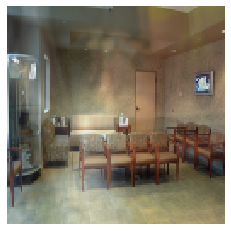

In [271]:
plt.axis('off')
plt.imshow(subject_resized * alpha + reflection)




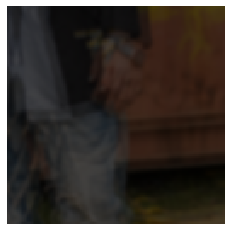

In [262]:
reflection = cv2.filter2D(astigma_cropped, ddepth=-1, kernel=kernel)
plt.axis('off')


plt.imshow(reflection)

0.7234751


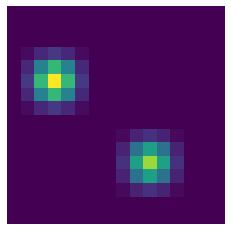

In [267]:
plt.imshow(kernel)
plt.axis('off')
print(alpha)

In [244]:
plt.imshow(subject)

TypeError: Image data of dtype object cannot be converted to float

In [ ]:
plt.imshow(subject2 * 0.25)

In [137]:
subject2 = subject.astype(np.float32) / 255.0

In [143]:
astigma_cropped

array([[[105, 100,  94],
        [114, 107, 101],
        [103,  93,  91],
        ...,
        [230, 212, 198],
        [230, 210, 199],
        [229, 207, 194]],

       [[104, 101,  92],
        [110, 106,  97],
        [102,  92,  90],
        ...,
        [230, 212, 198],
        [229, 210, 196],
        [228, 206, 192]],

       [[101,  96,  90],
        [115, 108, 102],
        [102,  94,  91],
        ...,
        [231, 213, 199],
        [230, 211, 196],
        [227, 206, 189]],

       ...,

       [[ 44,  39,  35],
        [ 59,  54,  50],
        [ 62,  57,  53],
        ...,
        [221, 197, 173],
        [215, 187, 163],
        [213, 180, 149]],

       [[ 46,  41,  37],
        [ 62,  59,  54],
        [ 61,  56,  52],
        ...,
        [221, 197, 173],
        [215, 188, 161],
        [213, 180, 149]],

       [[ 49,  44,  40],
        [ 63,  60,  55],
        [ 60,  55,  51],
        ...,
        [221, 197, 173],
        [215, 188, 161],
        [212, 179, 148]]

In [177]:
print(np.random.randint(3, 4))

3


In [178]:
print(cv2.__version__)

4.1.2


In [5]:
import torch

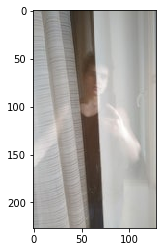

In [36]:
checkpoint = torch.load('./checkpoints/unet_v13_e19.hdf5', map_location=torch.device('cpu'))

model = checkpoint['model']
model.load_state_dict(checkpoint['model_state_dict'])
model.eval()

img = cv2.imread("./data/basket/pexa.jpg")
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img)
#img = cv2.cvtColor(img, cv2.COLOR_RGB2BGR)
#img = cv2.cvtColor(img, cv2.COLOR_BGR2LAB)
img = img.transpose((2, 0, 1))[None, ...].astype(np.float32) / 255.0
img = torch.Tensor(img)

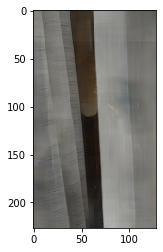

In [37]:
out = model(img)['transmission']
out = out.data.numpy()
out = (255.0 * out[0, ...]).clip(0, 255).astype(np.uint8)
out = out.transpose((1, 2, 0))

#out2 = cv2.cvtColor(out, cv2.COLOR_LAB2RGB)
plt.imshow(out)

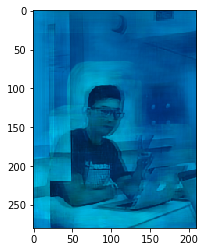

In [205]:
out2 = cv2.cvtColor(out, cv2.COLOR_LAB2RGB)
plt.imshow(out2)

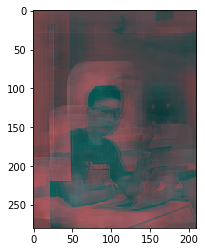

In [204]:
out = (255.0 * out[0, ...]).clip(0, 255).astype(np.uint8)
out = out.transpose((1, 2, 0))
plt.imshow(out)

320 240
(704, 528, 3)


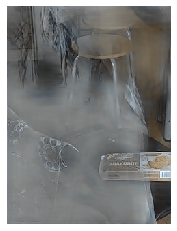

In [74]:
import torch
import numpy as np
import cv2
import matplotlib.pyplot as plt

checkpoint = torch.load('./checkpoints/unet_v30_e9.hdf5', map_location=torch.device('cpu'))

filename = "./data/basket/cookies.jpg"
coef = 2.2

model = checkpoint['model']
model.load_state_dict(checkpoint['model_state_dict'])
model.eval()

img = cv2.imread(filename)
n, m, c = img.shape
print(n, m)
out_img = cv2.resize(img, (int(m * coef), int(n * coef)))
cv2.imwrite("cook.jpg", out_img)

img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

img = img.transpose((2, 0, 1))[None, ...].astype(np.float32) / 255.0
img = torch.Tensor(img)

out = model(img)['transmission']
out = out.data.numpy()
out = (255.0 * out[0, ...]).clip(0, 255).astype(np.uint8)
out = out.transpose((1, 2, 0))

out2 = cv2.cvtColor(out, cv2.COLOR_RGB2BGR)
out2 = cv2.resize(out2, (int(m * coef), int(n * coef)))
cv2.imwrite("out_rgb.jpg", out2)
print(out2.shape)
plt.axis('off')
plt.imshow(out)


(704, 528, 3)


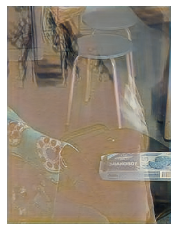

In [75]:
#LAAAAAAB
import torch
import numpy as np
import cv2
import matplotlib.pyplot as plt

checkpoint = torch.load('./checkpoints/unet_v21_e17.hdf5', map_location=torch.device('cpu'))

model = checkpoint['model']
model.load_state_dict(checkpoint['model_state_dict'])
model.eval()

img = cv2.imread(filename)

n, m, c = img.shape
out_img = cv2.resize(img, (int(m * coef), int(n * coef)))
cv2.imwrite("egr.jpg", out_img)

img = cv2.cvtColor(img, cv2.COLOR_BGR2LAB)

img = img.transpose((2, 0, 1))[None, ...].astype(np.float32) / 255.0
img = torch.Tensor(img)

out = model(img)['transmission']
out = out.data.numpy()
out = (255.0 * out[0, ...]).clip(0, 255).astype(np.uint8)
out = out.transpose((1, 2, 0))

out2 = cv2.cvtColor(out, cv2.COLOR_LAB2BGR)
out2 = cv2.resize(out2, (int(m * coef), int(n * coef)))
cv2.imwrite("out_lab.jpg", out2)
print(out2.shape)
plt.axis('off')
plt.imshow(out2)



/Users/sergevkim/anaconda3/lib/python3.7/site-packages/torch/serialization.py:657: SourceChangeWarning: source code of class 'models.UNet.UNet' has changed. you can retrieve the original source code by accessing the object's source attribute or set `torch.nn.Module.dump_patches = True` and use the patch tool to revert the changes.
  warnings.warn(msg, SourceChangeWarning)


NameError: name 'legacy_2' is not defined

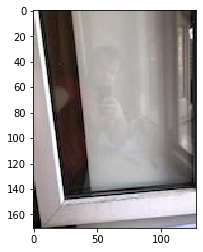

In [1]:
import torch
import numpy as np
import cv2
import matplotlib.pyplot as plt

checkpoint = torch.load('./checkpoints/unet_v7_e5.hdf5', map_location=torch.device('cpu'))

model = checkpoint['model']
model.load_state_dict(checkpoint['model_state_dict'])
model.eval()

img = cv2.imread("./data/basket/egr.jpg")
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img)
img = img.transpose((2, 0, 1))[None, ...].astype(np.float32) / 255.0
img = torch.Tensor(img)

out = model(img)['transmission']
out = out.data.numpy()
out = (200 * out[0, ...]).clip(0, 255).astype(np.uint8)
out = out.transpose((1, 2, 0))
#out2 = cv2.cvtColor(out, cv2.COLOR_LAB2BGR)
plt.axis('off')
plt.imshow(out)


In [ ]:
img = cv2.imread("./data/basket/egr.jpg")
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.axis('off')
plt.imshow(img)

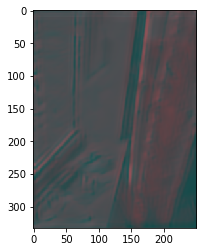

In [215]:
checkpoint = torch.load('./weights/resnet_v8_e1.hdf5', map_location=torch.device('cpu'))

model = checkpoint['model']
model.load_state_dict(checkpoint['model_state_dict'])
model.eval()

img = cv2.imread("./data/basket/book.jpg")
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
img = img.transpose((2, 0, 1))[None, ...].astype(np.float32) / 255.0
img = torch.Tensor(img)

out = model(img)['transmission']
out = out.data.numpy()
out = (255.0 * out[0, ...]).clip(0, 255).astype(np.uint8)
out = out.transpose((1, 2, 0))

#out2 = cv2.cvtColor(out, cv2.COLOR_RGB2)
plt.imshow(out)


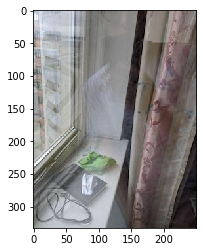

In [212]:
img = cv2.imread("./data/basket/book.jpg")
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img)

In [234]:

b = np.array([
    [1, 2, 3],
    [4, 5, 6],
])

print(b.T)
print()
print(b)

[[1 4]
 [2 5]
 [3 6]]

[[1 2 3]
 [4 5 6]]


In [236]:

a = np.array([4, 5, 6])

print(a.T)
print()
print(a)

[4 5 6]

[4 5 6]


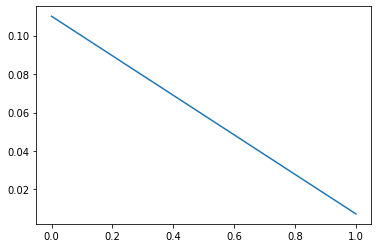

In [238]:
def plot_history(history):
    mse_t = history['mse_t']
    psnr_t = history['psnr_t']
    x = np.arange(len(mse_t))

    plt.plot(x, mse_t)


history_val = {
    'mse_t': [
        0.11008436404741727,
        0.007265792908030354,    
    ],
    'psnr_t': [
        0,
        1
    ]
}

plot_history(history_val)

In [239]:
from torch.utils.tensorboard import SummaryWriter
import numpy as np

writer = SummaryWriter()

for n_iter in range(100):
    writer.add_scalar('Loss/train', np.random.random(), n_iter)
    writer.add_scalar('Loss/test', np.random.random(), n_iter)
    writer.add_scalar('Accuracy/train', np.random.random(), n_iter)
    writer.add_scalar('Accuracy/test', np.random.random(), n_iter)

(256, 256, 3)


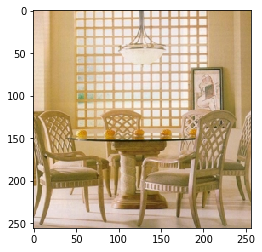

In [15]:
subject = cv2.imread("./data/subject_images/white_dining_room.jpg")
print(subject.shape)
subject = cv2.cvtColor(subject, cv2.COLOR_BGR2RGB)
subject = cv2.
plt.imshow(subject)